In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/"
names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"]
df = pd.read_csv(url + "iris.data", header=None, names=names)

In [40]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import mutual_info_regression

# 1.1 Clustering Data with k-Means

# 1.1.1

In [42]:
lalbel_encoder = LabelEncoder()

In [43]:
df_transform = df.copy()

In [44]:
df_transform['Name_Label'] = lalbel_encoder.fit_transform(df_transform["Name"])

In [45]:
df_transform.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name,Name_Label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c87e490>,
      dtype=object)

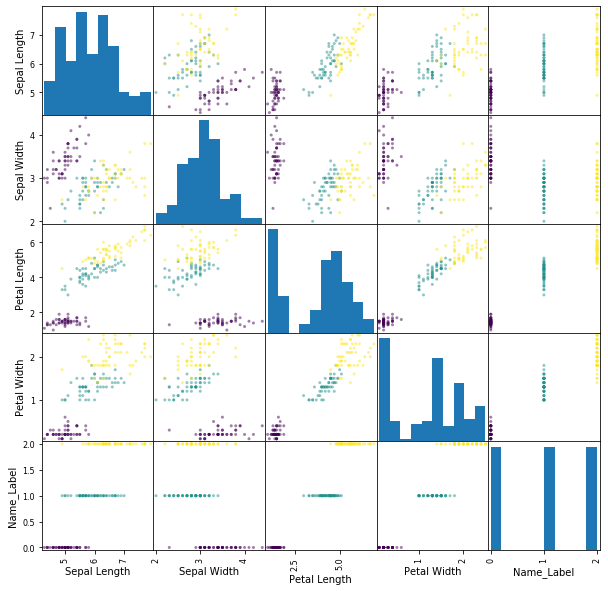

In [46]:
scatter_matrix(df_transform, alpha=0.5, c=df_transform["Name_Label"], figsize=(10, 10))

In [47]:
df_transform[df_transform['Name'] == 'Iris-setosa'].mean()

Sepal Length    5.006
Sepal Width     3.418
Petal Length    1.464
Petal Width     0.244
Name_Label      0.000
dtype: float64

In [48]:
df_transform[df_transform['Name'] == 'Iris-versicolor'].mean()

Sepal Length    5.936
Sepal Width     2.770
Petal Length    4.260
Petal Width     1.326
Name_Label      1.000
dtype: float64

In [49]:
df_transform[df_transform['Name'] == 'Iris-virginica'].mean()

Sepal Length    6.588
Sepal Width     2.974
Petal Length    5.552
Petal Width     2.026
Name_Label      2.000
dtype: float64

Purple = Iris-setosa; Green = Iris-versicolor; Yellow = Iris-virginica. Overall, three classes appear to be equally well-separated on most plots.
However, we can see some difference in plots such as Sepal Length vs Sepal Width, Petal Length vs Sepal Length, and Petal Length vs Petal Width where many Iris-versicolor and Iris-virginica points stay close together(appear to be in the same clusters). To better understand the difference between these 3 classes, will need to apply further analysis.

# 1.1.2

In [50]:
df_input = df.drop(['Name'], axis = 1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_input)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'After kmeans')

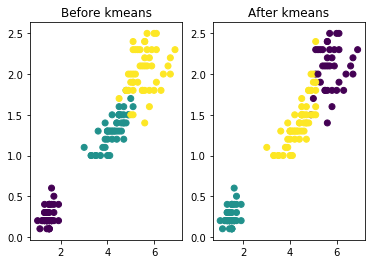

In [51]:
plt.subplot(1, 2, 1)
plt.scatter(df_input['Petal Length'], df_input['Petal Width'], c= df_transform['Name_Label'])
plt.title('Before kmeans')

plt.subplot(1, 2, 2)
plt.scatter(df_input['Petal Length'], df_input['Petal Width'], c=kmeans.labels_)
plt.title("After kmeans")

# 1.1.3 

In [52]:
actual_value = df_transform['Name_Label'].to_numpy()

In [53]:
predicted_value = kmeans.labels_

In [54]:
pd.crosstab(actual_value, predicted_value)

col_0,0,1,2
row_0,,,
0,0,50,0
1,2,0,48
2,36,0,14


In my original data set, 0 = Iris-setosa; 1 = Iris-versicolor; 2 = Iris-virginica. Based on scatter plots, I believe that in k-means labels, 0 = Iris-versicolor; 1 = Iris-setosa; 2 = Iris-virginica. 16 instances are misclassified, and one cluster label corresponds perfectly to Iris-setosa. These obeservations agree with what I observed from scatter plot matrix.

# 1.2 Hierarchical Clustering of Features

# 1.2.1

In [55]:
X = df.iloc[:, :-1]

In [56]:
sepal_length = df.iloc[:, 0:1]

In [57]:
sepal_width = df.iloc[:, 1:2]

In [58]:
petal_length = df.iloc[:, 2:3]

In [59]:
petal_width = df.iloc[:, 3:4]

In [60]:
s1 = mutual_info_regression(X, sepal_length).tolist()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
s2 = mutual_info_regression(X, sepal_width).tolist()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
s3 = mutual_info_regression(X, petal_length).tolist()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
s4 = mutual_info_regression(X, petal_width).tolist()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
mutual_info = pd.DataFrame(data=[s1, s2, s3, s4], 
                           columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

In [65]:
mutual_info

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,3.174345,0.268228,0.847510,0.625380
1,0.325656,2.676362,0.342978,0.441076
2,0.890511,0.360407,3.150638,1.203595
3,0.618792,0.403102,1.219394,2.661804


In [66]:
mutual_info1 = pd.DataFrame(data=[s1, s2, s3, s4], columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], 
                            index =["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

In [67]:
mutual_info1

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,3.174345,0.268228,0.847510,0.625380
Sepal Width,0.325656,2.676362,0.342978,0.441076
Petal Length,0.890511,0.360407,3.150638,1.203595
Petal Width,0.618792,0.403102,1.219394,2.661804


# 1.2.2

In [68]:
model = AgglomerativeClustering(n_clusters = 4)
model = model.fit(mutual_info1)

In [69]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

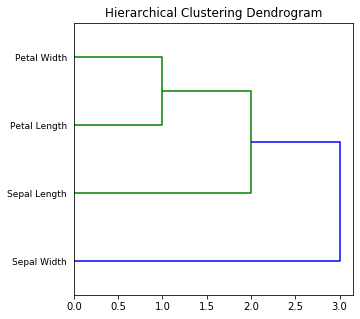

In [70]:
figure = plt.figure(figsize=(5, 5))
labels = mutual_info1.index.values
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=labels, orientation='right', leaf_font_size=9)

Based on clustering dendrogram generated above, petal width and petal length are the most similar pair of features. Sepal width is most unlinke the other 3 features.